Modelo carregado com sucesso!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step

Imagem de teste: hand2_7_bot_seg_2_cropped.jpeg
Previsão do modelo: 7
Confiança: 1.00


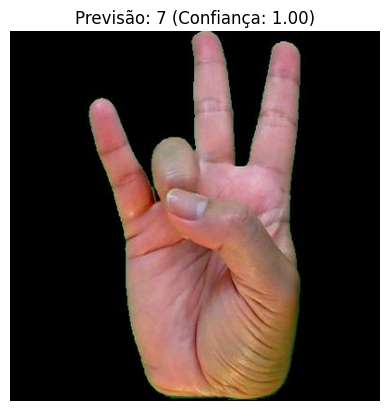


Probabilidades para todas as classes:
  0: 0.0000
  1: 0.0000
  2: 0.0000
  3: 0.0000
  4: 0.0000
  5: 0.0000
  6: 0.0000
  7: 1.0000
  8: 0.0000
  9: 0.0000
  a: 0.0000
  b: 0.0000
  c: 0.0000
  d: 0.0000
  e: 0.0000
  f: 0.0000
  g: 0.0000
  h: 0.0000
  i: 0.0000
  j: 0.0000
  k: 0.0000
  l: 0.0000
  m: 0.0000
  n: 0.0000
  o: 0.0000
  p: 0.0000
  q: 0.0000
  r: 0.0000
  s: 0.0000
  t: 0.0000
  u: 0.0000
  v: 0.0000
  w: 0.0000
  x: 0.0000
  y: 0.0000
  z: 0.0000


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2 
import os

model_path = 'asl_gesture_model2.h5' 
model = tf.keras.models.load_model(model_path)
print("Modelo carregado com sucesso!")


image_width, image_height = 32, 32 # Dimensões esperadas pelo modelo, então se mudar no treinamento, deve ser alterado aqui também
input_shape = (image_height, image_width, 3)

# Lista de classes correspondentes aos índices do modelo (na ordem em que foram treinadas)
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

# Caminho da imagem de teste
image_path = r'ASL_Gestures_36_Classes/test/7/hand2_7_bot_seg_2_cropped.jpeg'


img = cv2.imread(image_path)

if img is None:
    print(f"Erro: Não foi possível carregar a imagem em {image_path}")
else:

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    resized_img = cv2.resize(img_rgb, (image_width, image_height))

    normalized_img = resized_img.astype('float32') / 255.0

    input_img = np.expand_dims(normalized_img, axis=0)

    predictions = model.predict(input_img)

    predicted_class_index = np.argmax(predictions[0]) 
    predicted_letter = class_names[predicted_class_index] 
    confidence = predictions[0][predicted_class_index] 

    print(f"\nImagem de teste: {os.path.basename(image_path)}")
    print(f"Previsão do modelo: {predicted_letter}")
    print(f"Confiança: {confidence:.2f}")

    plt.imshow(img_rgb)
    plt.title(f"Previsão: {predicted_letter} (Confiança: {confidence:.2f})")
    plt.axis('off')
    plt.show()

    print("\nProbabilidades para todas as classes:")
    for i, prob in enumerate(predictions[0]):
        print(f"  {class_names[i]}: {prob:.4f}")